<a id='BacktoTop'></a>

### SMU NLP Course (DS7337) -- Homework 01 submission  (05-12-2019)
### Shanqing Gu (Class 401)

###  Table of Contents 

#### 1. [Install Python and NLTK](#InstallPN) 
#### 2. [Instructions for implementing a “lexical diversity” scoring routine](#BKLex)
#### 3. [Obtain 3 texts, report the lexical diversity score and explain the results](#ORE)
#### 4. [Compare the vocabulary size of the same 3 texts and explain the results](#CE)
#### 5. [Argue if vocabulary size and lexical diversity in combination could be a better measure of text difficulty](#BetterMeasure)

<a id='InstallPN'></a>
#### Section 1: Install Python and NLTK
Install Python (if you don’t have it already), and install NLTK

The installed Python version used for this homework is 3.6.8 and the NLTK version is 3.4

[Back to top](#BacktoTop)

In [1]:
## Check Python and NLTK versions

from platform import python_version
print('The Python version is {}.'.format(python_version()))

import nltk
print('The NLTK version is {}.'.format(nltk.__version__))

The Python version is 3.6.8.
The NLTK version is 3.4.


<a id='BKLex'></a>
#### Section 2: Instructions for implementing a “lexical diversity” scoring routine
Follow the instructions in chapter 1 of Bird-Klein for implementing a “lexical diversity” scoring routine

2.1 Import some external libraries for this homework

2.2 Lexical diversity score function

[Back to top](#BacktoTop)

#### 2.1 Import some external libraries for this homework

Import some external libraries: numpy, pandas, PlaintextCorpusReader, matplotlib.pyplot, rcParams

In [2]:
import numpy as np
import pandas as pd

from nltk.corpus import PlaintextCorpusReader

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
plt.rc('xtick', labelsize=15)  
plt.rc('ytick', labelsize=15) 

#### 2.2 Lexical diversity score function

“token” is defined as a particular appearance of a given word in a text; 

“type” is defined as the unique form of the word as a particular sequence of letters;

"Lexical diversity score" is defined as token/type ratio, counting word tokens by using len(text) and word types by using len(set(text)).

In [3]:
## Define lexical diversity score function based on the instructions in chapter 1 of Bird-Klein (Ref. 1)

def lexical_diversity(text):
    tokens = len(text) 
    types = len(set(text)) 
    diversity_score = types / tokens 
    return diversity_score

<a id='ORE'></a>
#### Section 3: Obtain 3 texts, report the lexical diversity score and explain the results

Go to http://www.gutenberg.org/wiki/Children%27s_Instructional_Books_(Bookshelf), and obtain three texts (of different grade levels) from the “Graded Readers” section. Report the lexical diversity score of each. Explain whether the result was surprising

##### 3.1 Follow instructions to obtain 3 tests of different grade levels from the "Graded Readers" section.

##### 3.2 Report the lexical diversity score of each (table and plot).

##### 3.3 Explain whether the result was surprising


[Back to top](#BacktoTop)

#### 3.1 Follow instructions to obtain 3 texts of different grade levels from the "Graded Readers" section

3 texts of different grade levels from the "Graded Readers" section in McGuffey's Eclectic Reader Book'.

2nd grade: ('mg2_pg14668.txt'), 4th grade: ('mg4_pg14880.txt'), 6th grade: (mg6_pg16751.txt').

Also check the start of corpus file.

In [4]:
## Get file path

file_dir = "/Users/shanqinggu/Desktop/"
corpus_root = "./texts"
files = ".*\.txt"

In [5]:
## Create an NLTK corpus for evaluation

readers = PlaintextCorpusReader(corpus_root, files)
readers.fileids()
corpus = nltk.Text(readers.words())

print('3 text files:', readers.fileids()) ## Read a directory of 3 texts, also can use os.listdir(corpus_root)
print('Start of corpus file:', corpus)

3 text files: ['mg2_pg14668.txt', 'mg4_pg14880.txt', 'mg6_pg16751.txt']
Start of corpus file: <Text: The Project Gutenberg EBook of McGuffey ' s...>


#### 3.2 Report the lexical diversity score of each (table and plot)

In [6]:
## Create summary table for 'Genre', 'Tokens', 'Types', and 'Lexical diversity'

lexDiv_table = pd.DataFrame(columns = ['Genre', 'Tokens', 'Types', 'Lexical diversity'])

i_index = []
i_index = 0

for fileid in readers.fileids():
    tokens = len(readers.words(fileid))
    types = len(set(readers.words(fileid)))
    rtxt = readers.words(fileid)
    ldiv = lexical_diversity(rtxt)
    
    table = {'Genre' : fileid, 'Tokens' : tokens, 'Types' : types,'Lexical diversity': ldiv} 

    df_table = pd.DataFrame(table, 
                          columns = ['Genre', 'Tokens', 'Types','Lexical diversity'], 
                          index = [i_index + 1])
    i_index += 1
    lexDiv_table = lexDiv_table.append(df_table, sort=True).copy()

In [7]:
lexDiv_table = lexDiv_table.sort_values(lexDiv_table.columns[2], ascending = True)
print('Table 1: Lexical diversity score summary for 3 texts')
lexDiv_table

Table 1: Lexical diversity score summary for 3 texts


,Genre,Lexical diversity,Tokens,Types
1,mg2_pg14668.txt,0.150838,26439,3988
2,mg4_pg14880.txt,0.116135,87278,10136
3,mg6_pg16751.txt,0.097926,172590,16901


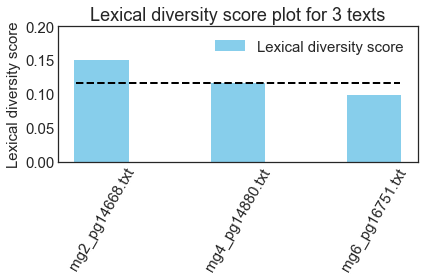

In [9]:
## Plot lexical diversity scores for 3 texts
ind = np.arange(3) 
width = 0.4

_ = plt.figure(figsize = (6, 4))
offset = width/2
plt.bar(ind + offset, lexDiv_table['Lexical diversity'], width, 
        label='Lexical diversity score', align='center', color = 'skyblue')

plt.xticks(ind + offset, lexDiv_table['Genre'], rotation=60, fontsize = '15' )
plt.legend(loc='best', fontsize ='15')
plt.title('Lexical diversity score plot for 3 texts', fontsize = '18')
plt.ylabel('Lexical diversity score', fontsize = '15')
plt.axhline(y=0.116, xmin=0.05, xmax=0.95, color='k', linestyle='--', linewidth=2)

axes = plt.gca()
axes.set_ylim([0, 0.20])

plt.show()

#### 3.3 Explain whether the result was surprising

From the lexical diversity score summary table and plots for 3 different texts selected from the McGuffey readers, we can find that lexical diversity scores increase with lowering the grade level. For example, the lexical diversity score for McGuffey's 2nd grade readers is more than 50% higher than that of McGuffey's 6th grade readers (dashed line is used to mark the lexical diversity score at 0.116).

If lexical diversity score is used to measure the text difficulty of English language, we would expect that the score for McGuffey's 6th grade readers is higher than that of McGuffey's 2nd grade readers.

Obviously, the lexical diversity scores calculated from this method do meet our expectation from the reality.

<a id='CE'></a>
#### Section 4:  Compare the vocabulary size of the same 3 texts and explain the results
Also compare the vocabulary size of the same three texts. Explain whether the result was surprising.

##### 4.1 Compare the vocabulary size of the same 3 texts (table and plot)

##### 4.2 Explain whether the result was surprising

[Back to top](#BacktoTop)

#### 4.1 Compare the vocabulary size of the same 3 texts

The vocabulary of a text is just the set of tokens that it uses with all duplicates are collapsed together. In Python we can obtain the vocabulary by set() command. Here, we also count lowercase-only items with num_vocab() when not counting all capitalized words (this scenario was discussed in the chapter 1 of Bird-Klein book).

In [10]:
vocab_table = pd.DataFrame(columns = ['Genre', 'Num_words', 'Num_vocab', 'Types', 'Tokens'])

i_index = []
i_index = 0

for fileid in readers.fileids():
    tokens = len(readers.words(fileid))
    num_words = len(readers.words(fileid))
    num_vocab = len(set(word.lower() for word in readers.words(fileid)))
    types = len(set(readers.words(fileid)))    
       
    table = {'Genre' : fileid, 'Num_words' : num_words, 'Num_vocab' : num_vocab, 'Types' : types, 'Tokens': tokens} 

    df_vocab_table = pd.DataFrame(table,
                          columns = ['Genre', 'Num_words','Num_vocab', 'Types', 'Tokens'],
                          index = [i_index + 1])
    i_index += 1
    vocab_table = vocab_table.append(df_vocab_table, sort=True).copy()

In [11]:
vocab_table = vocab_table.sort_values(vocab_table.columns[3], ascending = True)
print('Results_tbl - sorted by col 3')
vocab_table

Results_tbl - sorted by col 3


,Genre,Num_vocab,Num_words,Tokens,Types
1,mg2_pg14668.txt,3390,26439,26439,3988
2,mg4_pg14880.txt,8826,87278,87278,10136
3,mg6_pg16751.txt,14611,172590,172590,16901


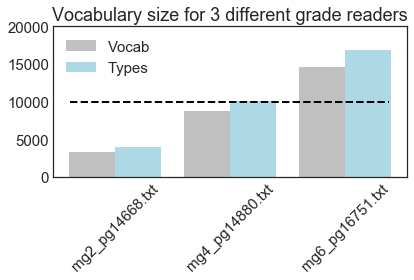

In [12]:
## Plot vocabulary size for 3 different grade readers

ind = np.arange(3) 
width = 0.4

_ = plt.figure(figsize = (6, 4))
offset = width / 2
plt.bar(ind + offset, vocab_table['Num_vocab'], width, label='Vocab', color = 'silver')
plt.bar(ind + offset + width, vocab_table['Types'], width, label='Types', color = 'lightblue')

plt.xticks(ind + width, vocab_table['Genre'], rotation=45)
plt.legend(loc='upper left', fontsize ='15')
plt.title('Vocabulary size for 3 different grade readers', fontsize = '18')

plt.axhline(y=10000, xmin=0.05, xmax=0.95, color='k', linestyle='--', linewidth=2)

axes = plt.gca()
axes.set_ylim([0, 20000])

plt.show()

#### 4.2 Explain whether the result was surprising

From the summary table and plots as shown above, we can find there are 26439 tokens, 3988 distinct words ("Types") and 3390 lowercase words ("Vocab") in McGuffey 2 book. These values continue to increase significantly with higher grade readers (McGuffey 4 and 6 books). There are more vocabulary words in the books for higher grade readers. These results are well expected and not surprising like lexical diversity score measurement in Section 3. 

<a id='BetterMeasure'></a>
#### Section 5:  Argue if vocabulary size and lexical diversity in combination could be a better measure of text difficulty
Write a paragraph arguing whether vocabulary size and lexical diversity in combination could be a better measure of text difficulty (or reading level) than either measure is by itself.

5.1 Scatterplot with log-transformed values ("Types" and "Tokens" against "Num_vocab")

5.2 Use vocabulary size and lexical diversity in combination to measure text difficulty (table and plot)

5.3 Explain whether this is a better measure of text difficulty than either measure is by itself.

[Back to top](#BacktoTop)

#### 5.1 Scatterplot with log-transformed values ("Types" and "Tokens" vs. "Num_vocab")

Considering the large value variations, we use scatterplot with log tranformed values ("Types", "Tokens", "Num_vocab") to understand the potential relationship between "Token" and "types" (or "Num_vocab").

In [13]:
vocab_table['Types'] = vocab_table['Types'].astype(np.float64)
vocab_table['Tokens'] = vocab_table['Tokens'].astype(np.float64)
vocab_table['Num_vocab'] = vocab_table['Num_vocab'].astype(np.float64)

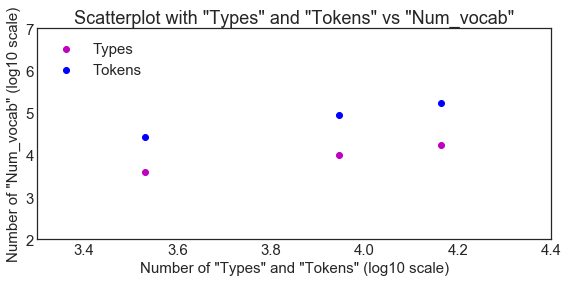

In [14]:
## Scatterplot with log-transformed values ("Types" and "Tokens" against "Num_vocab")

ind = np.arange(3) 
width = 0.4

_ = plt.figure(figsize = (8, 4))
offset = width / 2
plt.scatter(np.log10(vocab_table['Num_vocab']), np.log10(vocab_table['Types']), color = 'm')
plt.scatter(np.log10(vocab_table['Num_vocab']), np.log10(vocab_table['Tokens']), color = 'b')

plt.legend(loc='upper left', fontsize = '15')
plt.title('Scatterplot with "Types" and "Tokens" vs "Num_vocab"', fontsize = '18')
plt.xlabel('Number of "Types" and "Tokens" (log10 scale)', fontsize = '15')
plt.ylabel('Number of "Num_vocab" (log10 scale)', fontsize = '15')

axes = plt.gca()
axes.set_xlim([3.3, 4.4])
axes.set_ylim([2, 7])

plt.show()

#### 5.2 Use vocabulary size and lexical diversity in combination to measure text difficulty (table and plot)

In [15]:
## Create summary table for 'Genre', 'Types', 'Tokens', 'Num_vocab', 'Lexical diversity', 'NV_ldiv'.
## "NV_ldiv" is to define the adjusted "Lexical diversity" with "num_vocab"

nlz_table = pd.DataFrame(columns = ['Genre', 'Types', 'Tokens', 'Num_vocab', 'Lexical diversity', 'NV_ldiv'])

i_index = []
i_index = 0

for fileid in readers.fileids():
    tokens = len(readers.words(fileid))
    types = len(set(readers.words(fileid)))
    rtxt = readers.words(fileid)
    ldiv = lexical_diversity(rtxt)
       
    num_words = len(readers.words(fileid))
    num_vocab = len(set(word.lower() for word in readers.words(fileid)))
    
    nv_ldiv = ldiv * num_vocab    

    table = {'Genre' : fileid, 'Types' : types, 'Tokens': tokens, 'Num_vocab' : num_vocab,
             'Lexical diversity': ldiv, 'NV_ldiv' : nv_ldiv} 
    
    df_table = pd.DataFrame(table, 
                            columns = ['Genre', 'Types', 'Tokens', 'Num_vocab', 'Lexical diversity', 'NV_ldiv'], 
                            index = [i_index + 1])
    i_index += 1
    nlz_table = nlz_table.append(df_table, sort=True).copy()

In [16]:
## Minimum maximum normalization[0, 1]: the minimum value is mapped to 0 and the maximum value is mapped to 1.

results = nlz_table.copy()
results = results.sort_values(nlz_table.columns[3], ascending = True)

df = results.iloc[:, 1:6]
df_nlz = (df-df.min())/(df.max()-df.min()) # use minimum maximum normalization [0,1]
# df_nlz = df / df.max() # also can use maximum normalization only, or Z-score

df_labels = results.iloc[:, 0]

results = pd.concat([df_labels, df_nlz], axis = 1)

print('Calculation summary after minimum maximum normalization')
results

Calculation summary after minimum maximum normalization


,Genre,Lexical diversity,NV_ldiv,Num_vocab,Tokens,Types
1,mg2_pg14668.txt,1.000000,0.000000,0,0,0
2,mg4_pg14880.txt,0.344136,0.558663,0.484449,0.416275,0.476109
3,mg6_pg16751.txt,0.000000,1.000000,1,1,1


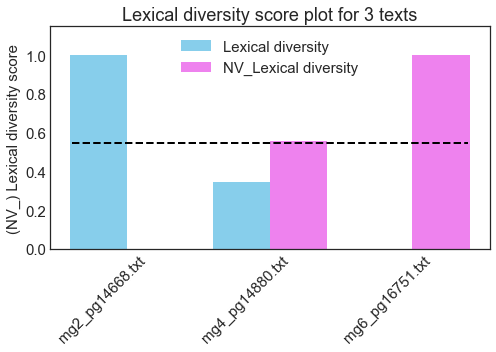

In [17]:
## Plot the lexical diversity scores (w/o normalization and w/ normalization) for 3 texts

ind = np.arange(3) 
width = 0.4

_ = plt.figure(figsize = (7, 5))
offset = 0
plt.bar(ind + offset, results['Lexical diversity'], width, 
        label='Lexical diversity', align='center', color = 'skyblue')

plt.bar(ind + offset+width, results['NV_ldiv'], width, 
        label='NV_Lexical diversity', align='center', color = 'violet')

plt.xticks(ind + width / 16, results['Genre'], rotation=45)
plt.legend(loc='best', fontsize ='15')
plt.title('Lexical diversity score plot for 3 texts', fontsize = '18')
plt.ylabel('(NV_) Lexical diversity score', fontsize = '15')

plt.axhline(y=0.55, xmin=0.05, xmax=0.95, color='k', linestyle='--', linewidth=2)

axes = plt.gca()
axes.set_ylim([0, 1.15])

plt.show()

#### 5.3 Explain whether this is a better measure of text difficulty than either measure is by itself.

From the scatterplot with log-transformed values ("Types" and "Tokens" against "Num_vocab") in Section 5.1, we can find that vocabulary size increases with higher grade readers and the measure of textual lexical diversity in Section 3 can be diverted by this trend.

The possible solutions are to normalize the data with minimum maximum normalization (or other methods, like Z-Score or maximum normalization) and also adjust lexical diversity score by multiplying vocabulary size. With this modification, we can see the adjusted lexical diversity scores basically reflect the language difficulties corresponding different grade readers and eliminate the vocabulary size effects.    

We can use this method to test more texts and predict the lexical diversity scores for specific texts before giving different groups of students to read. 

####  References

1. Steven Bird, Ewan Klein, Edward Loper. Natural language processing with Python. O’Reilly Media, Inc., 2009. Print.
2. Computing with Language: Texts and Words. http://www.nltk.org/book/ch01.html

-- The End of Homework 01 --